In [193]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import numpy as np
import random
import pandas as pd

In [194]:
class MoneyModel(Model):
    
    """A model with some number of agents."""
   
    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        
        # Create agents  
        
        for i in range(self.num_agents):          
            a = MoneyAgent(i, self)
            self.schedule.add(a)

    def step(self):
        '''Advance the model by one step.'''
        ag_sch = self.schedule.step()
        #print(ag_sch)

In [195]:
class MoneyAgent(Agent):
    
    """ An agent with fixed initial wealth."""    

    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        
        for w in [random.randint (100,1000)]:
            self.wealth = w
        
        for c in [random.randint (5,500)]:
            self.cost = c 

    def step(self):

    #This step indicates the minimum wealth an agent must have in order to participate
        if (self.wealth == 0 or self.wealth < 0):
            self.wealth += 500

    # Here is where the exchange is happening, an agent buys from another one, first agent wealth 
    # reduces while the second agent wealth increases while transacting one of the products      
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += self.cost
        self.wealth -= self.cost


        agent_N = ["Investor   ","Consumer   ","Prosumer   ","Retailer   ","Distributor"]

        #This is done to organize each wealth of agents after transactions happen
        tempAgent_W.append([self.unique_id, self.wealth])

        #print ("Hi, I am " + agent_N[self.unique_id] + " and my wealth is " + str(self.wealth))
        print (f"Hi, I am {agent_N[self.unique_id]} and my wealth is {str(self.wealth)}")

        #Command to show the results
        return agent_N[self.unique_id], self.wealth

In [196]:
#Big collaboration from Godwin
Agents=5
tempAgent_W=[]
Result=[]
df_=pd.DataFrame(data=Result, columns=[str(i) for i in range(Agents)])

agent_N = ["Investor   ","Consumer   ","Prosumer   ","Retailer   ","Distributor"]

def _arangeData(tempAgent_W):
    global df_
    wealthList=[]
    tempAgent_W.sort(key=lambda x: x[0], reverse=False)
    for j in range(Agents):        
        wealthList.append(tempAgent_W[j][1])
    new_row = {str(n):wealthList[n] for n in range(len(wealthList))}
    df_ = df_.append(new_row, ignore_index=True)
    return

In [197]:
empty_model = MoneyModel(Agents)
empty_model.step()

Hi, I am Investor    and my wealth is 59
Hi, I am Distributor and my wealth is 990
Hi, I am Retailer    and my wealth is 256
Hi, I am Prosumer    and my wealth is 180
Hi, I am Consumer    and my wealth is 681


In [198]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()
print(df_)

Empty DataFrame
Columns: [0, 1, 2, 3, 4]
Index: []


In [199]:
#Godwin helps to customize the number of steps into a variable

model = MoneyModel(Agents)
sim_Step=50
for i in range(sim_Step):
    #print("Wealth for step "+str(i))
    print (f'wealth for step {str(i)}')
    model.step()
    _arangeData(tempAgent_W)
    tempAgent_W=[]

    
#agent_wealth = [a.wealth for a in model.schedule.agents]
#plt.hist(agent_wealth)

wealth for step 0
Hi, I am Consumer    and my wealth is 570
Hi, I am Prosumer    and my wealth is 1031
Hi, I am Investor    and my wealth is 887
Hi, I am Distributor and my wealth is 183
Hi, I am Retailer    and my wealth is 482
wealth for step 1
Hi, I am Distributor and my wealth is 253
Hi, I am Retailer    and my wealth is 63
Hi, I am Investor    and my wealth is 1207
Hi, I am Consumer    and my wealth is 1308
Hi, I am Prosumer    and my wealth is 1082
wealth for step 2
Hi, I am Prosumer    and my wealth is 1082
Hi, I am Retailer    and my wealth is -356
Hi, I am Distributor and my wealth is 11
Hi, I am Consumer    and my wealth is 1249
Hi, I am Investor    and my wealth is 1167
wealth for step 3
Hi, I am Prosumer    and my wealth is 1842
Hi, I am Distributor and my wealth is 11
Hi, I am Investor    and my wealth is 1175
Hi, I am Consumer    and my wealth is 1190
Hi, I am Retailer    and my wealth is -275
wealth for step 4
Hi, I am Prosumer    and my wealth is 2312
Hi, I am Consumer 

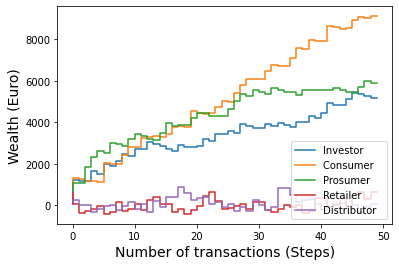

In [200]:
#Configurations for the graph
fig = plt.figure()
x_axis=[m for m in range (sim_Step)]
for i in range(Agents):
    plt.step(x_axis, df_[str(i)], label=agent_N[i])
plt.legend(loc=5, bbox_to_anchor=(1, .2))
plt.xlabel('Number of transactions (Steps)', fontsize=14)
plt.ylabel('Wealth (Euro)', fontsize=14)
plt.show()